<a href="https://colab.research.google.com/github/divediamic530/Olymplic_Data_analysis/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Pandas**

In [3]:
import pandas as pd

**Importing NumPY and** **Searborn** **bold text**

In [4]:
import numpy as np
import seaborn as sns

**Importing Mat PLotlib **

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

**Fetching data from data file summer.csv**

In [6]:
data=pd.read_csv("summer.csv")
print(data.head(5))

   Year    City     Sport  ... Gender                       Event   Medal
0  1896  Athens  Aquatics  ...    Men              100M Freestyle    Gold
1  1896  Athens  Aquatics  ...    Men              100M Freestyle  Silver
2  1896  Athens  Aquatics  ...    Men  100M Freestyle For Sailors  Bronze
3  1896  Athens  Aquatics  ...    Men  100M Freestyle For Sailors    Gold
4  1896  Athens  Aquatics  ...    Men  100M Freestyle For Sailors  Silver

[5 rows x 9 columns]


In [ ]:
data.rename(columns={'Total':'Total_Medals'},inplace=True)

**Printing data from bottom**

In [ ]:
print(data.tail())

       Year    City      Sport  ... Gender     Event   Medal
31160  2012  London  Wrestling  ...    Men  Wg 84 KG  Bronze
31161  2012  London  Wrestling  ...    Men  Wg 96 KG    Gold
31162  2012  London  Wrestling  ...    Men  Wg 96 KG  Silver
31163  2012  London  Wrestling  ...    Men  Wg 96 KG  Bronze
31164  2012  London  Wrestling  ...    Men  Wg 96 KG  Bronze

[5 rows x 9 columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [ ]:
data.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


**Checking The Null Value in Data File Summer.CSV**

In [ ]:
nan_values=data.isna()
nan_columns=nan_values.any()
nan_columns

Year          False
City          False
Sport         False
Discipline    False
Athlete       False
Country        True
Gender        False
Event         False
Medal         False
dtype: bool

In [ ]:
data.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

1. **Total medals distributed  Till Now**

In [ ]:
#Total Medals
data.Medal.value_counts()

Gold      10486
Bronze    10369
Silver    10310
Name: Medal, dtype: int64

2.Total Medals Won By India Till Now

In [ ]:
#total Medals won by India
data.query('Country=="IND"')

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
241,1900,Paris,Athletics,Athletics,"PRITCHARD, Norman",IND,Men,200M,Silver
244,1900,Paris,Athletics,Athletics,"PRITCHARD, Norman",IND,Men,200M Hurdles,Silver
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold
5514,1928,Amsterdam,Hockey,Hockey,"GATELEY, Maurice A.",IND,Men,Hockey,Gold
...,...,...,...,...,...,...,...,...,...
29879,2012,London,Boxing,Boxing,"KOM, Mary",IND,Women,51 KG,Bronze
30841,2012,London,Shooting,Shooting,"NARANG, Gagan",IND,Men,10M Air Rifle,Bronze
30849,2012,London,Shooting,Shooting,"KUMAR, Vijay",IND,Men,25M Rapid Pistol,Silver
31111,2012,London,Wrestling,Wrestling Freestyle,"DUTT, Yogeshwar",IND,Men,Wf 60 KG,Bronze


3. **First Medal Won by India**

In [ ]:
data.query('Country=="IND"').head(1)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
241,1900,Paris,Athletics,Athletics,"PRITCHARD, Norman",IND,Men,200M,Silver


4. **Top Countries Participating in Summer olympics based on players** 

In [ ]:
#Top Countries Participating
top_countries=data.Country.value_counts().sort_values(ascending=False).head(10)

In [ ]:
top_countries

USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
Name: Country, dtype: int64

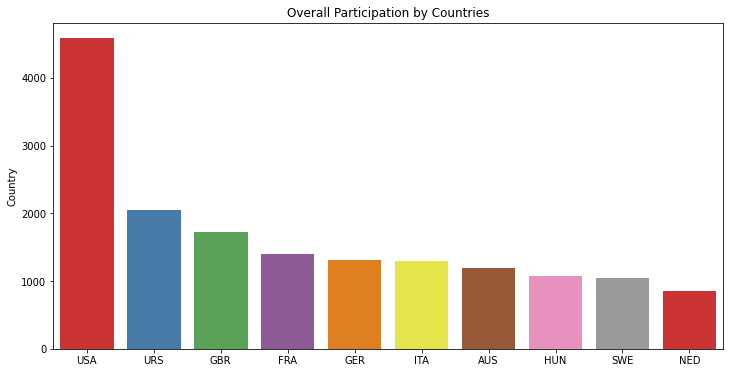

In [ ]:
#Plotting Graph For Top 10 Countries Participating
plt.figure(figsize=(12,6))
plt.title('Overall Participation by Countries')
sns.barplot(x=top_countries.index, y=top_countries,palette='Set1');


** Total of How many Countries till now participated in summer Olympics**

In [7]:
#In how many  countries Participated in Olympic so far?
data['Country'].unique()


array(['HUN', 'AUT', 'GRE', 'USA', 'GER', 'GBR', 'FRA', 'AUS', 'DEN',
       'SUI', 'ZZX', 'NED', 'BEL', 'IND', 'CAN', 'BOH', 'SWE', 'NOR',
       'ESP', 'ITA', 'CUB', 'ANZ', 'RSA', 'FIN', 'RU1', 'EST', 'TCH',
       'NZL', 'BRA', 'JPN', 'LUX', 'ARG', 'POL', 'POR', 'URU', 'YUG',
       'ROU', 'HAI', 'EGY', 'PHI', 'IRL', 'CHI', 'LAT', 'MEX', 'TUR',
       'PAN', 'JAM', 'SRI', 'KOR', 'PUR', 'PER', 'IRI', 'TRI', 'URS',
       'VEN', 'BUL', 'LIB', 'EUA', 'ISL', 'PAK', 'BAH', 'BWI', 'TPE',
       'ETH', 'MAR', 'GHA', 'IRQ', 'SIN', 'TUN', 'KEN', 'NGR', 'GDR',
       'FRG', 'UGA', 'CMR', 'MGL', 'PRK', 'COL', 'NIG', 'THA', 'BER',
       'TAN', 'GUY', 'ZIM', 'CHN', 'CIV', 'ZAM', 'DOM', 'ALG', 'SYR',
       'SUR', 'CRC', 'INA', 'SEN', 'DJI', 'AHO', 'ISV', 'EUN', 'NAM',
       'QAT', 'LTU', 'MAS', 'CRO', 'ISR', 'SLO', 'IOP', 'RUS', 'UKR',
       'ECU', 'BDI', 'MOZ', 'CZE', 'BLR', 'TGA', 'KAZ', 'UZB', 'SVK',
       'MDA', 'GEO', 'HKG', 'ARM', 'AZE', 'BAR', 'KSA', 'KGZ', 'KUW',
       'VIE', 'MKD',

In [39]:
#Unique City 
data['City'].unique()
# Unique Cities in Which Summer Olympics Has been held.

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

6.  Gender Distribution In Summer OLympics** 

In [ ]:
#Male and Female Players In the Events 
gendis=data.Gender.value_counts().sort_values(ascending=False).head(10)
gendis

Men      22746
Women     8419
Name: Gender, dtype: int64

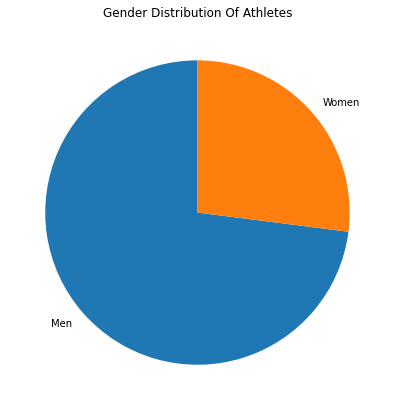

In [ ]:
#Plotting Graph For Gender Distribution
plt.figure(figsize=(14,7))
plt.title('Gender Distribution Of Athletes')
plt.pie(gendis, labels=gendis.index,startangle=90);

 7. Which Sport Have Most Number Of Gold Medal Till Now

In [8]:
#which Sport is having most number of Gold medals
sport_by_medal = data[(data["Medal"] == "Gold")][["Sport", "Medal"]]
sport_by_medal = sport_by_medal.value_counts(["Sport"]).reset_index(name = "Count of Gold Medals")[:5]
sport_by_medal

,Sport,Count of Gold Medals
0,Aquatics,1421
1,Athletics,1215
2,Rowing,890
3,Gymnastics,820
4,Fencing,552


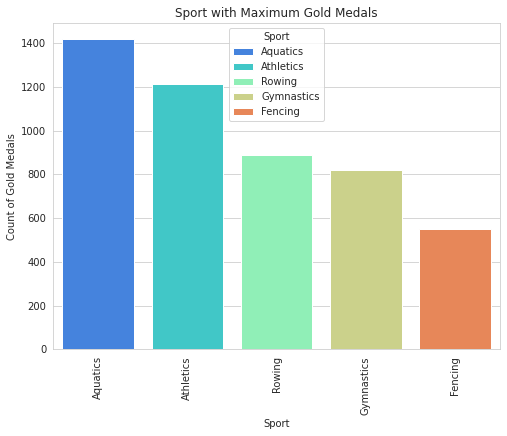

In [17]:
#Graph representation Of which Sports have maximum number of Gold medals.
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (8,6)

plt.title("Sport with Maximum Gold Medals")
barplot = sns.barplot(data=sport_by_medal, x="Sport", y="Count of Gold Medals",hue="Sport",palette="rainbow", dodge=False)
barplot.set_xticklabels(rotation=90, labels=sport_by_medal.Sport)
plt.ylabel("Count of Gold Medals")
plt.show()


8. Which individual Player has won most number of medals.

In [20]:
#Which Individual Player has most Number of Gold Medals.

medal = data[["Athlete","Medal"]]
medal = medal.value_counts("Athlete").reset_index(name="Count of Medals")[:5]
medal

,Athlete,Count of Medals
0,"PHELPS, Michael",22
1,"LATYNINA, Larisa",18
2,"ANDRIANOV, Nikolay",15
3,"MANGIAROTTI, Edoardo",13
4,"SHAKHLIN, Boris",13


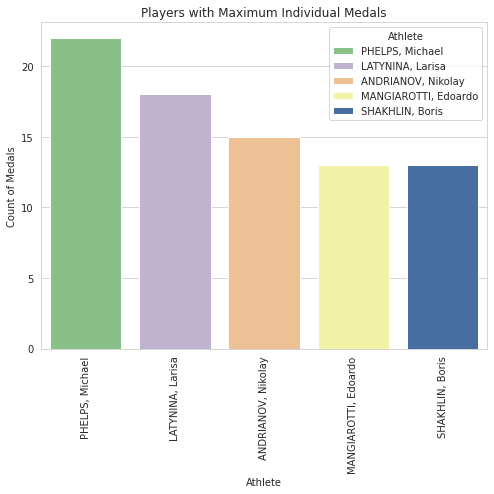

In [24]:
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (8,6)

plt.title("Players with Maximum Individual Medals")
barplot = sns.barplot(data=medal, x="Athlete", y="Count of Medals",hue="Athlete",palette="Accent", dodge=False)
barplot.set_xticklabels(rotation=90, labels=medal.Athlete)
plt.ylabel("Count of Medals")
plt.show()

Which Individual player Has won most number of gold medals.

In [26]:
#Which Player Have Maximum NUmber Of Gold Medals.
individual_medals = data[(data["Medal"] == "Gold")][["Athlete", "Medal"]]
individual_medals = individual_medals.value_counts(["Athlete"]).reset_index(name = "Count of Gold Medals")[:5]
individual_medals

,Athlete,Count of Gold Medals
0,"PHELPS, Michael",18
1,"NURMI, Paavo",9
2,"SPITZ, Mark",9
3,"LEWIS, Carl",9
4,"LATYNINA, Larisa",9


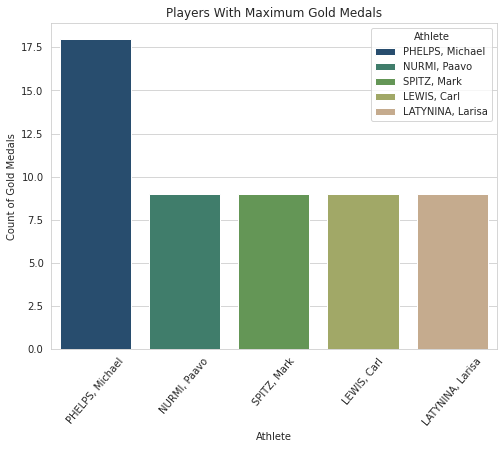

In [30]:
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (8,6)

plt.title("Players With Maximum Gold Medals")
barplot = sns.barplot(data=individual_medals, x="Athlete", y="Count of Gold Medals", hue="Athlete", palette="gist_earth", dodge=False)
barplot.set_xticklabels(rotation=50, labels=individual_medals.Athlete)
plt.ylabel("Count of Gold Medals")
plt.show()

In which Year India won it's first gold medal.

In [31]:
#India's First Gold Medal..

India_gold = data [(data ["Medal"] == "Gold") & (data ["Country"] == "IND")][["Medal", "Year"]]
India_gold = India_gold.value_counts(["Year"]).reset_index(name = "Count of Gold Medals")[:]
India_gold.sort_values("Year")

,Year,Count of Gold Medals
5,1928,15
7,1932,11
1,1936,19
0,1948,20
6,1952,14
2,1956,17
4,1964,15
3,1980,16
8,2008,1


Which Events has most Number of Female Gold medalists.

In [32]:
#Which Event has most Numbers of Female Champions(Gold medalists).
F_medal = data [(data ["Medal"] == "Gold") & (data ["Gender"] == "Women")][["Sport", "Medal"]]
F_medal = F_medal.value_counts(["Sport"]).reset_index(name = "Count of Gold Medals")[:5]
F_medal

,Sport,Count of Gold Medals
0,Aquatics,589
1,Athletics,389
2,Gymnastics,268
3,Rowing,217
4,Volleyball,166


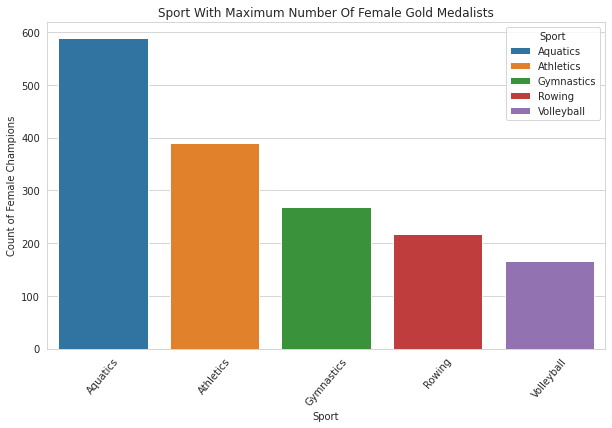

In [34]:
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (10,6)

plt.title("Sport With Maximum Number Of Female Gold Medalists")
barplot = sns.barplot(data=F_medal, x="Sport", y="Count of Gold Medals", hue="Sport", palette="tab10", dodge=False)
barplot.set_xticklabels(rotation=50, labels=F_medal.Sport)
plt.ylabel("Count of Female Champions")
plt.show()

Which team event is most popular in terms of players participation.

In [36]:
popular_event = data[["Event","Athlete"]]
popular_event = popular_event.value_counts("Event").reset_index(name="Count of Players")[:5]
popular_event

,Event,Count of Players
0,Football,1497
1,Hockey,1422
2,Team Competition,1147
3,Basketball,1012
4,Handball,973


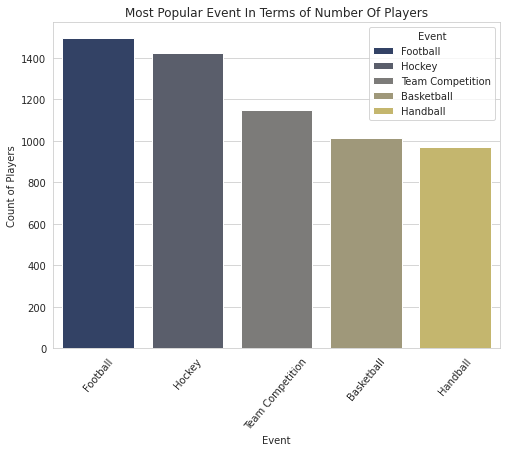

In [38]:
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (8,6)

plt.title("Most Popular Event In Terms of Number Of Players")
barplot = sns.barplot(data=popular_event, x="Event", y="Count of Players", hue="Event",palette="cividis", dodge=False)
barplot.set_xticklabels(rotation=50, labels=popular_event.Event)
plt.ylabel("Count of Players")
plt.show()